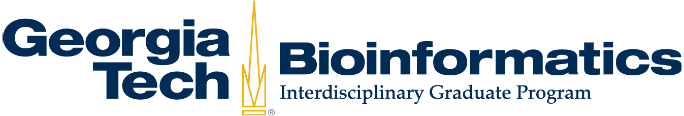

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 3 (Variant Calling) starter notebook (100 points)</h2>
    <h3>Deadline: 11:59PM, October 7th, 2024</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Getting ready for variant calling**
### *Total Questions: 6*
### *Total Points: 5 + 10 + 5 + 20 + 5 + 20 = 65*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check your SAM file (you can also convert your SAM file to a BAM file and do the exercises on that)</h3>
    <p>1.1.1 We will start from where we left off in Project #2. We want to make sure that we are using the corrent SAM file.</p>
    <p>1.1.2 Show that your SAM file is sorted</p>
    
</div>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [9]:
#Check you SAM file here.
os.chdir("/home/hice1/ssteele37/project3_sandbox/")
!ls

hg38.fa			       SRR788462.bam		 SRR788462_sorted.sam
hg38.fa.fai		       SRR788462_chr20.mpileup	 SRR788462.vcf
Project3-exploreation.ipynb    SRR788462_pileup.txt	 SRR788462.vcf.gz
Project3-VariantCalling.ipynb  SRR788462_sorted.mpileup


In [4]:
#Show that your SAM file is sorted by genomic coordinates.
!samtools stats SRR788462_sorted.sam | grep "sorted"
!samtools view SRR788462_sorted.sam |  head -5

#sorted flag is 1

# The command line was:  stats SRR788462_sorted.sam
SN	is sorted:	1
SRR788462.3	99	chr1	13138	0	76M	=	13207	145	TACCTGAGGCTGAGGAAGGAGAAGGGGATGCACTGTTGGGGAGGCAGCTGTAACTCAAAGCCTTAGCCTCTGTTCC	CCCFFFDFHHHHHIJHGHIFEGGIIJIIIJJHIGIGHJJJJGGIIIJJJJJHHHHFEFFFDEECCEEEDDDDDDDD	NM:i:0	MD:Z:76	MC:Z:76M	AS:i:76	XS:i:76
SRR788462.3	147	chr1	13207	0	76M	=	13138	-145	CTGTTCCCACGAAGGCAGGGCCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACC	@DDFFFHHGJJIJJJJIIJJJJIIGFIGFBCIIIGIJGJJIIHJJJJJJJIJJIJJJJJIIHGGHHHHFFFDD@C@	NM:i:0	MD:Z:76	MC:Z:76M	AS:i:76	XS:i:76
SRR788462.318311	99	chr1	13376	0	76M	=	13485	185	TTCACTCCTGCCTTTTCCTTTCCCTAGAGCCTCCACCACCCCGAGATCACATTTCTCACTGCCTTTTGTCTGCCCA	C@@FFFFFGHHFDGHGDHIIGGGGIIEFGAHGIJJIIGGHJGGGIGIIIGCGGHGGIJIIJIIGEHEFHGFFFFE@	NM:i:0	MD:Z:76	MC:Z:76M	AS:i:76	XS:i:76
SRR788462.6	163	chr1	13398	0	76M	=	13443	121	CCTAGAGCCTCCACCACCCCGAGATCACATTTCTCACTGCCTTTTGTCTGCCCAGTTTCACCAGAAGTAGGCCTCT	CCCFFFFFHHHHHJJJJJJJJJJJJJJJGGJJJJJJJJJJJJJJJIIJJJHGICHGIIIIJJGIFHGCEDFFFFFE	NM:i:0	MD:Z:

In [ ]:
#This was done in last project, but we want to check the sorted file again.

<div class="alert alert-block alert-warning">
    <h3>1.2 Basic statistics of your SAM file</h3>
    <p>Get basic stats of your SAM/BAM file. Use SAMstats to see what summary information can you get from the tool. </p>
</div>

In [5]:
# See what SAMStats can give you.
!SAMstats --help

usage: SAMstats [-h] --sorted_sam_file SORTED_SAM_FILE [--outf OUTF]
                [--chunk_size CHUNK_SIZE]

Compute SAM file mapping statistics for a SAM file sorted by read name

options:
  -h, --help            show this help message and exit
  --sorted_sam_file SORTED_SAM_FILE
                        Input SAM file. Use '-' if input is being piped from
                        stdin. File must be sorted by read name.
  --outf OUTF           Output file name to store alignment statistics. The
                        statistics will be printed to stdout if no file is
                        provided
  --chunk_size CHUNK_SIZE
                        Number of lines to read a time from sortedSamFile


<div class="alert alert-block alert-warning">
    <h3>1.3 The pieleup format</h3>
    <p><b>1.3.1</b> A lot of variant callers use the pielup format for calling variants from SAM file. Explain in 2-3 lines what is the pileup format?</p>
    <p><b>1.3.2</b> Explain the 6 columns of a pielup format file in your own words.</p>
</div>


A pileup file is a compact representation of the aligned sequences to a reference sequence. It's helpful in visualising and processing variations in aligned SAM/BAM files and DNA sequences. There are various types of pileup format including: SAMtools mpileup, BCFTools mpileup etc, each with their own slightly different features and formats. D

For the SAMtools mpileup the 6 fields are:
1. Sequence identifier: Refers to the particular DNA sequence that is analysed
2. Position in the sequence: Position of the base in the sequence 
3. Reference base: The base at that position in the reference sequence
4. Read depth: Number of reads aligning to that particular position of reference sequence
5. Read results: The identified bases at that position from the aligned reads
6. Read quality: The respective Phred Quality scores of the bases in col. 5 

<div class="alert alert-block alert-warning">
    <h3>1.4 Create the pileup file</h3>
    <p>Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals</p>
</div>

In [2]:
#Your command for pileup here.
#!cp /home/hice1/ssuresh317/Sanjana_notebooks/project_2/ref_fasta/hg38.fa .
#!ls -lh
!samtools mpileup -f hg38.fa SRR788462_sorted.sam > SRR788462_sorted.mpileup

[mpileup] 1 samples in 1 input files


In [3]:
#Show the first 10 lines of the Pileup file.
!head SRR788462_sorted.mpileup -n10
print("-----------------------------------")
#Show the 10,000 - 10,010 lines of the Pileup file.
!head -n 10000 SRR788462_sorted.mpileup | tail -11
print("-----------------------------------")
#Show the 200,000 - 200,010 lines of the Pileup file.
!head -n 200000 SRR788462_sorted.mpileup | tail -11

chr1	13138	T	1	^!.	C
chr1	13139	A	1	.	C
chr1	13140	C	1	.	C
chr1	13141	C	1	.	F
chr1	13142	T	1	.	F
chr1	13143	G	1	.	F
chr1	13144	A	1	.	D
chr1	13145	G	1	.	F
chr1	13146	G	1	.	H
chr1	13147	C	1	.	H
-----------------------------------
chr1	523295	C	1	.	:
chr1	523296	T	1	.	4
chr1	523297	T	1	.	@
chr1	523298	T	1	.	@
chr1	523299	G	1	.	@
chr1	523300	G	1	.	@
chr1	523301	G	0	*	*
chr1	523302	A	0	*	*
chr1	523303	A	0	*	*
chr1	523328	C	1	^!.	C
chr1	523329	A	1	.	C
-----------------------------------
chr1	3823358	G	3	...	JJF
chr1	3823359	T	3	...	JGD
chr1	3823360	G	3	...	JHH
chr1	3823361	G	3	...	IJH
chr1	3823362	C	3	...	JCH
chr1	3823363	A	3	...	JGF
chr1	3823364	C	3	...	JII
chr1	3823365	T	3	...	FII
chr1	3823366	T	3	...	JJG
chr1	3823367	C	3	...	GII
chr1	3823368	C	3	...	GJJ


<div class="alert alert-block alert-warning">
    <h3>1.5 Look more into the pileup file</h3>
    <p>Show the 100,000th entry in your pileup file and explain (2-4 lines) what information column 5 <b><i>Read Results</i></b> is providing the user</p>
</div>

In [4]:
#Show the 100,000th entry here.
!head -n 100000 SRR788462_sorted.mpileup | tail -n 1

chr1	1645279	C	4	..,,	EFJA


The 5th column in the pileup shows what bases were found at that position relative to the reference file.
Our results show two dots and 2 commas in the read results column.
The two dots mean two bases matched the reference on the forward strand while the two commas mean two bases matched the reference on the reverse strand

<div class="alert alert-block alert-warning">
    <h3>1.6 Plot the read count distribution</h3>
    <p>A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
    <p>Plot a graph (thin bars or line) between <b><i>Read Count (y-axis)</i></b> and <b><i>Position (x-axis)</i></b> only for <u>chromosome 20</u>.</p>
    <hr>
    <p>You can use Python for visualization, but will have to filter the pileup file using bash or python.</p>
</div>

In [5]:
#An awk command can help you create a file with just the information for chr20.
!awk '$1 ~ /^chr20/ { print $1, $2, $3, $4, $5, $6 }' SRR788462_sorted.mpileup > SRR788462_chr20.mpileup
!head -10 SRR788462_chr20.mpileup | tail -10

chr20 87508 T 1 ^]. >
chr20 87509 T 1 . >
chr20 87510 A 1 . C
chr20 87511 A 1 . F
chr20 87512 T 1 . F
chr20 87513 A 1 . F
chr20 87514 A 1 . D
chr20 87515 T 1 . F
chr20 87516 T 1 . G
chr20 87517 T 1 . H


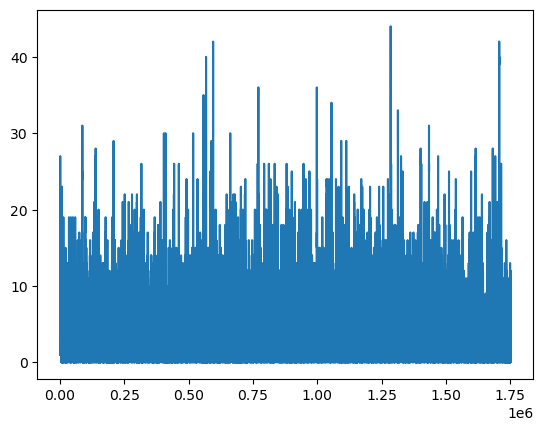

In [20]:
#Plot your graph and show it here (matplotlib/seaborn)
chr20_df = pd.read_csv("SRR788462_chr20.mpileup", delimiter = ' ', header=None)
chr20_df.head()
#x = chr20_df.iloc[:,1]
y = chr20_df.iloc[:,3]

plt.plot(y)

# **2. Variant calling**
### *Total Questions: 3*
### *Total Points: 10+5+2+10 = 27*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Call the variants (SNPs and Short Indels)</h3>
    <p><b>2.1.1</b> Write the command used and justify the flags you have used using one sentence.</p>
    <p><b>2.1.2</b> Informed decision.</p>
</div>

In [32]:
#Use VarScan for calling variants. Look up the appropriate command for this.
!varscan pileup2cns --help
!varscan pileup2cns SRR788462_sorted.mpileup --min-reads2 8 --output-vcf> SRR788462.vcf

Min coverage:	8
Min reads2:	2
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
USAGE: java -jar VarScan.jar pileup2cns [pileup file] OPTIONS
	pileup file - The SAMtools pileup file

	OPTIONS:
	--min-coverage	Minimum read depth at a position to make a call [8]
	--min-reads2	Minimum supporting reads at a position to call variants [2]
	--min-avg-qual	Minimum base quality at a position to count a read [15]
	--min-var-freq	Minimum variant allele frequency threshold [0.01]
	--min-freq-for-hom	Minimum frequency to call homozygote [0.75]
	--p-value	Default p-value threshold for calling variants [99e-02]
	--variants	Report only variant (SNP/indel) positions [0]
Min coverage:	8
Min reads2:	8
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from SRR788462_sorted.mpileup
76995148 bases in pileup file
8371911 met minimum coverage of 8x
8371911 positions were called
6331761 called Reference
2040089 called SNP
61 called indel


We are using pileup2cns as it handles both SNPs and InDels in one command and are using the default parameters for 
for min coverage (8), min avg qual (15), min var freq (0.01) and p-val, but have increased the min reads2 from default 2 to match min coverage of 8 to 
ensure higher quality variant calls. This also increased our SNP variant calls from an unrealistic 4000 SNPs to a more realistic 2 million SNPs.

<div class="alert alert-block alert-warning">
    <h3>2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16</h3>
    <p><b>Q.</b> What is the average depth of bases for this variant called on chromosome 16</p>
</div>

In [23]:
#Extract this variant. There are multiple ways of doing this. Some fast and some easy.
vcf_df = pd.read_csv("SRR788462.vcf", delimiter = "\t")
vcf_df.head()

,Chrom,Position,Ref,Cons,Reads1,Reads2,VarFreq,Strands1,Strands2,Qual1,Qual2,Pvalue,MapQual1,MapQual2,Reads1Plus,Reads1Minus,Reads2Plus,Reads2Minus,VarAllele
0,chr1,30362,G,N,8,0,0%,1,0,43,0,1.0,1,0,0,8,0,0,NaN
1,chr1,30363,A,N,8,0,0%,1,0,44,0,1.0,1,0,0,8,0,0,NaN
2,chr1,30364,C,N,8,0,0%,1,0,45,0,1.0,1,0,0,8,0,0,NaN
3,chr1,30365,A,N,8,0,0%,1,0,45,0,1.0,1,0,0,8,0,0,NaN
4,chr1,30366,G,N,8,0,0%,1,0,45,0,1.0,1,0,0,8,0,0,NaN


In [29]:
chr16_vcf = vcf_df[vcf_df['Chrom'] == 'chr16']
chr16_vcf_subset = chr16_vcf[(chr16_vcf['Position'] >= 2080000) & (chr16_vcf['Position'] <= 3080000) & (chr16_vcf['Reads2'] > 0)]
print(chr16_vcf_subset[chr16_vcf_subset['Position'] == 2762889])

         Chrom  Position Ref Cons  Reads1  Reads2 VarFreq  Strands1  Strands2  \
3064036  chr16   2762889   A    G       0      25    100%         0         2   

         Qual1  Qual2        Pvalue  MapQual1  MapQual2  Reads1Plus  \
3064036      0     41  7.910729e-15         0         1           0   

         Reads1Minus  Reads2Plus  Reads2Minus VarAllele  
3064036            0          18            7         G  


The average depth of bases for our selected variant is 25, with 100% matching an SNP variant call for the base G instead of the reference A.

<div class="alert alert-block alert-warning">
    <h3>2.3 How many indels do you have in your VCF file?</p>
</div>

According to the Varscan CNS output summary, we have 61 variants called as indels

<div class="alert alert-block alert-warning">
    <h3>2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.</h3>
    <p><b>2.4.1</b> What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?</p>
    <p><b>2.4.2</b> How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?</p>
</div>

In [25]:
#Select the variant.
vcf_df.head() #Variation observed and number of copies for reference allele.
vcf_chr2_df = vcf_df[vcf_df['Chrom']=='chr2']
print(vcf_chr2_df[vcf_chr2_df['Position'] == 218584677])

        Chrom   Position Ref Cons  Reads1  Reads2 VarFreq  Strands1  Strands2  \
5021732  chr2  218584677   C    C      16       1   5.88%         2         1   

         Qual1  Qual2  Pvalue  MapQual1  MapQual2  Reads1Plus  Reads1Minus  \
5021732     46     41     0.5         1         1           7            9   

         Reads2Plus  Reads2Minus VarAllele  
5021732           1            0         T  


Variation at this position is 0/1, it references 2 alleles

There are 16 reads supporting the reference allele and 1 read supporting the Variant allele   

# **3. Filtering**
### *Total Questions: 1*
### *Total Points: 8 = 8*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Extract variants that have average per sample depth of > 50. </h3>
    <p>Show your command and number of variants before and after</p>
</div>

In [58]:
var_df = vcf_df[vcf_df['Cons'] != 'N']
vcf_df['avg_depth'] = vcf_df[['Reads1','Reads2']].sum(axis=1)
filtered_vcf_df = vcf_df[vcf_df['avg_depth']>50]
filtered_var_df = var_df[var_df['avg_depth']>50]


num_noncon_variants_after = len(filtered_vcf_df)
num_con_variant_after = len(filtered_var_df)

print("All variant before: " + str(len(vcf_df)))
print("All called with consensus before: " + str(len(var_df)))
print("All variant after: " + str(num_variants_after))
print("All called with consensus variant after: " + str(num_con_variant_after))

All variant before: 8371911
All called with consensus before: 3739296
All variant after: 14286
All called with consensus variant after: 14286
